In [61]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
from datetime import datetime

In [2]:
DATA_PATH = r'/scratch/gallowaa/cciw/Data'

In [3]:
# Search for all video files on Google Drive...
all_images = glob(os.path.join(DATA_PATH,'Videos_and_stills/GLNI/*/*/*/Images/Quad*/*.jpg'))
#all_images = glob(os.path.join(DATA_PATH,'Videos_and_stills/GLNI/*/*/May.*/Stills/Quad*/*.jpg'))

In [4]:
imagetable_path = os.path.join(DATA_PATH, 'Tables', 'ImageTable.csv')
image_df = pd.read_csv(imagetable_path, index_col=0)

In [5]:
analysis_path = os.path.join(DATA_PATH, 'Tables', 'Analysis.csv')
dive_path = os.path.join(DATA_PATH, 'Tables', 'Dives.csv')

analysis_df = pd.read_csv(analysis_path, index_col=0, dtype={'Count':float})
dive_df = pd.read_csv(dive_path, index_col=0, parse_dates=['Date'])
data_df = pd.merge(analysis_df, dive_df, on='Dive Index', how='outer')
data_df.columns

Index(['Dive Index', 'Quadrat', 'Live Coverage', 'Empty Coverage', 'Biomass',
       'Count', '16mm', '14mm', '12.5mm', '10mm', '8mm', '6.3mm', '4mm', '2mm',
       'Analysis Index', 'Cruise #', 'CSN', 'PSN', 'Date', 'Depth (m)',
       'Overall Coverage', 'Silt (%)', 'Clay (%)', 'Sand (%)', 'Gravel (%)',
       'Cobble (%)', 'Rock (%)', 'Bedrock (%)', 'Boulders (%)', 'Shale (%)',
       'Underlying Substrate Type', 'Underlying Substrate Depth (cm)'],
      dtype='object')

In [8]:
"""note: these indices were determined by visual 
inspection of the images for i) good illumination/
clarity, ii) approximately constant camera distance,
and iii) low cladophora cover.""" 
indices = np.concatenate((np.arange(50, 60), 
                          np.arange(78, 82),
                          np.arange(92, 94),
                          np.arange(103, 105),
                          np.arange(129, 133),
                          np.arange(156, 171),
                          np.arange(129, 133),
                          np.arange(196, 207),
                          np.arange(218, 222),
                          np.arange(236, 238),
                         ))
print(len(indices))

58


In [14]:
dim = []
for i in indices:
    im = cv.imread(all_images[i])
    dim.append((i, im.shape[0]))
dim = np.asarray(dim)

In [31]:
working_set = dim[dim[:, 1] == 7378][:, 0]

In [36]:
%matplotlib

Using matplotlib backend: TkAgg


In [46]:
#for i in range(280, 500):
i=350
im = cv.imread(all_images[i])
rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)
plt.imshow(rgb[::4, ::4, :])
plt.title('frame ' + str(i))
plt.show()
#plt.pause(0.1)

In [47]:
root_fname = all_images[i].split('/')[-1].split('.')[0]
guid = image_df[image_df['Name'].str.contains(root_fname)]['Analysis Index'].astype('int64')
data_df[data_df['Analysis Index'].values == guid.values]

,Dive Index,Quadrat,Live Coverage,Empty Coverage,Biomass,Count,16mm,14mm,12.5mm,10mm,...,Clay (%),Sand (%),Gravel (%),Cobble (%),Rock (%),Bedrock (%),Boulders (%),Shale (%),Underlying Substrate Type,Underlying Substrate Depth (cm)
1561,520,2,10.0,2.0,27.11,671.0,0.0,0.0,0.0,0.0,...,0,0,100.0,0.0,0,0,0,0.0,Clay,15


In [38]:
plt.close('all')

In [42]:
all_images[350]

'/scratch/gallowaa/cciw/Data/Videos_and_stills/GLNI/1349/2017/Jul.20/Images/Quad2/GLNI_1349-2_2017-07-20_image-1.jpg'

In [53]:
data_df[data_df['Dive Index'].values == 520]

,Dive Index,Quadrat,Live Coverage,Empty Coverage,Biomass,Count,16mm,14mm,12.5mm,10mm,...,Clay (%),Sand (%),Gravel (%),Cobble (%),Rock (%),Bedrock (%),Boulders (%),Shale (%),Underlying Substrate Type,Underlying Substrate Depth (cm)
1560,520,1,1.0,0.0,3.95,181.0,0.0,0.0,0.0,0.000000,...,0,0,100.0,0.0,0,0,0,0.0,Clay,15
1561,520,2,10.0,2.0,27.11,671.0,0.0,0.0,0.0,0.000000,...,0,0,100.0,0.0,0,0,0,0.0,Clay,15
1562,520,3,5.0,1.0,17.59,706.0,0.0,0.0,0.0,0.001416,...,0,0,100.0,0.0,0,0,0,0.0,Clay,15


In [237]:
# Number of dives for each year-month
dive_df['Year-Month'] = dive_df['Date'].dt.strftime('%Y-%m')
dive_df_by_year_month = dive_df.groupby(by='Year-Month').count()['PSN']
dive_df_by_year_month.index = [datetime.strptime(year_month, '%Y-%m') for year_month in dive_df_by_year_month.index]
#dive_df_by_year_month

In [352]:
YM = '2018-08'
save_path = os.path.join('/scratch/ssd/gallowaa/cciw/dataset_raw_v0-2-x', YM)
print(save_path)

dive_idx = dive_df[dive_df['Year-Month'].values == YM].index #['Dive Index']
print(dive_idx)

/scratch/ssd/gallowaa/cciw/dataset_raw_v0-2-x/2018-08
Int64Index([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
            57, 58, 59],
           dtype='int64', name='Dive Index')


In [353]:
# analysis indices for data collected in 2018-07
indices = data_df.loc[data_df['Dive Index'].isin(dive_idx)]['Analysis Index'].values

In [354]:
#image_df[image_df['Analysis Index'].isin(indices)]
fnames = image_df[image_df['Analysis Index'].isin(indices)]['Name']

In [370]:
data_df.loc[data_df['Dive Index'].isin(dive_idx)]

,Dive Index,Quadrat,Live Coverage,Empty Coverage,Biomass,Count,16mm,14mm,12.5mm,10mm,...,Clay (%),Sand (%),Gravel (%),Cobble (%),Rock (%),Bedrock (%),Boulders (%),Shale (%),Underlying Substrate Type,Underlying Substrate Depth (cm)
120,40,1,5.0,0.5,69.72,132.0,0.000000,0.022727,0.128788,0.522727,...,0,85,0.0,10.0,5,0,0,0.0,Gravel and Cobble,NaN
121,40,2,0.5,0.5,0.00,0.0,NaN,NaN,NaN,NaN,...,0,85,0.0,10.0,5,0,0,0.0,Gravel and Cobble,NaN
122,40,3,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,...,0,85,0.0,10.0,5,0,0,0.0,Gravel and Cobble,NaN
123,41,1,25.0,5.0,138.22,526.0,0.000000,0.001901,0.003802,0.203422,...,0,0,20.0,50.0,30,0,0,0.0,NaN,NaN
124,41,2,1.0,5.0,28.35,98.0,0.000000,0.000000,0.040816,0.204082,...,0,0,20.0,50.0,30,0,0,0.0,NaN,NaN
125,41,3,25.0,5.0,137.44,392.0,0.000000,0.002551,0.028061,0.352041,...,0,0,20.0,50.0,30,0,0,0.0,NaN,NaN
126,42,1,0.0,1.0,0.00,0.0,NaN,NaN,NaN,NaN,...,0,0,5.0,15.0,5,75,0,0.0,NaN,NaN
127,42,2,1.0,1.0,6.58,41.0,0.000000,0.000000,0.000000,0.024390,...,0,0,5.0,15.0,5,75,0,0.0,NaN,NaN
128,42,3,1.0,1.0,4.50,27.0,0.000000,0.000000,0.000000,0.037037,...,0,0,5.0,15.0,5,75,0,0.0,NaN,NaN
129,43,1,45.0,5.0,148.26,315.0,0.000000,0.000000,0.028571,0.561905,...,0,0,10.0,20.0,60,0,10,0.0,Cobble/gravel,NaN


In [355]:
#data_df[data_df['Analysis Index'] == 57]

In [356]:
root = os.path.join(DATA_PATH,'Videos_and_stills/GLNI/')

In [358]:
dim = []
month = 'Aug.' # Jul, Jun
#for i, f in enumerate(fnames.values[portrait_mode]):
for i, f in enumerate(fnames.values):
    tokens = f.split('.')[0].split('_')
    PSN = tokens[1].split('-')[0]
    QUAD = tokens[1].split('-')[1]
    file = root + PSN + '/2018/' + month + tokens[2].split('-')[-1] + '/Images/Quad' + QUAD + '/' + f.split('.')[0] + '.jpg'
    im = cv.imread(file)
    #rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)
    #plt.imshow(rgb[::4, ::4, :])
    #plt.title('frame ' + str(i))
    #plt.pause(0.1)
    dim.append((i, im.shape[0]))
dim = np.asarray(dim)

In [362]:
vals, cts = np.unique(dim[:, 1], return_counts=True)
print(vals)
print(cts)
print(cts.sum())

portrait_mode = dim[:, 0][dim[:, 1] == 7378]

[3788 4924 6738 7378]
[14 34  6 31]
85


In [396]:
#root_fname

'GLNI_3552-2_2018-08-09_image-1'

In [398]:
#fnames.values[portrait_mode]

In [363]:
#i = 3
month = 'Aug.' # Jul, Jun
for i, f in enumerate(fnames.values[portrait_mode]):
    #f = fnames.values[portrait_mode][i]
    tokens = f.split('.')[0].split('_')
    PSN = tokens[1].split('-')[0]
    QUAD = tokens[1].split('-')[1]
    file = root + PSN + '/2018/' + month + tokens[2].split('-')[-1] + '/Images/Quad' + QUAD + '/' + f.split('.')[0] + '.jpg'
    im = cv.imread(file)
    rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)

    imc = im[y_start:y_end, x_start:x_end, :]
    scale_percent = 75 # percent of original size
    width = int(imc.shape[0] * scale_percent / 100)
    height = int(imc.shape[1] * scale_percent / 100)
    
    # resize image
    imcr = cv.resize(imc, (width, height))
    cv.imwrite(os.path.join(save_path, f.split('.')[0] + '_crop.jpg'), imcr)
    #plt.figure(figsize=(6, 12))
    #plt.imshow(rgb)
    #plt.title('frame ' + str(i) + ' of ' + str(len(fnames.values[portrait_mode])))

3000
3000


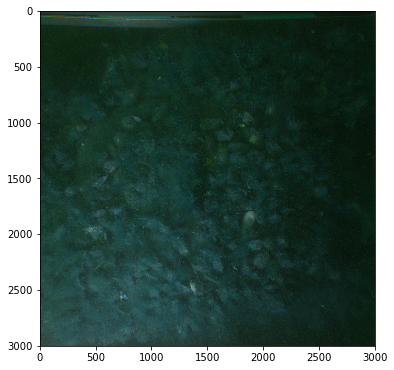

In [350]:
x_start, x_end = 1050, 4050
print(x_end - x_start)

y_start, y_end = 2100, 5100
print(y_end - y_start)

imc = im[y_start:y_end, x_start:x_end, :]

plt.figure(figsize=(6, 12))
plt.imshow(imc)

In [304]:
scale_percent = 75 # percent of original size
width = int(imc.shape[0] * scale_percent / 100)
height = int(imc.shape[1] * scale_percent / 100)
dim = (width, height)

# resize image
imcr = cv.resize(imc, dim)
cv.imwrite(os.path.join(save_path, f.split('.')[0] + '_crop.jpg'), imcr)

True

In [327]:
#width, height
width / 250

9.0

In [330]:
'''
wvz = 250 # 340, 283, 242, 212
n_plot = imcr.shape[0] // wvz
fig, axes = plt.subplots(n_plot, n_plot, figsize=(12, 12))

for row in range(imcr.shape[0] // wvz):
    for col in range(imcr.shape[0] // wvz):
        axes[row, col].imshow(imcr[row*wvz:(1+row)*wvz, col*wvz:(col+1)*wvz])
        axes[row, col].axis('off')
plt.tight_layout()        
'''
#plt.savefig(file + '_viz.png')

"\nwvz = 250 # 340, 283, 242, 212\nn_plot = imcr.shape[0] // wvz\nfig, axes = plt.subplots(n_plot, n_plot, figsize=(12, 12))\n\nfor row in range(imcr.shape[0] // wvz):\n    for col in range(imcr.shape[0] // wvz):\n        axes[row, col].imshow(imcr[row*wvz:(1+row)*wvz, col*wvz:(col+1)*wvz])\n        axes[row, col].axis('off')\nplt.tight_layout()        \n"

In [361]:
#(66 + 37 + 31) * 9**2

# You left off here...
plot Biomass/Count versus number of pixels labeled as mussel

In [435]:
#%matplotlib inline
#i = 2
#root_fname = fnames.values[portrait_mode][i].split('/')[-1].split('.')[0]
#guid = image_df[image_df['Name'].str.contains(root_fname)]['Analysis Index'].astype('int64')
#data_df[data_df['Analysis Index'].values == guid.values]

guid = image_df[image_df['Name'].str.contains('3538-2_2018-07-03')]['Analysis Index'].astype('int64')
data_df[data_df['Analysis Index'].values == np.unique(guid.values)]

,Dive Index,Quadrat,Live Coverage,Empty Coverage,Biomass,Count,16mm,14mm,12.5mm,10mm,...,Clay (%),Sand (%),Gravel (%),Cobble (%),Rock (%),Bedrock (%),Boulders (%),Shale (%),Underlying Substrate Type,Underlying Substrate Depth (cm)
64,21,2,95.0,5.0,275.93,688.0,0.0,0.0,0.052326,0.515988,...,0,0,10.0,20.0,60,0,10,0.0,Rock,NaN


In [479]:
fnames.values[portrait_mode][i].split('/')

['GLNI_3788-1_2018-08-14_image-1.nef']

# After Labeling
`./labelme2voc.py /scratch/ssd/gallowaa/cciw/dataset_raw_v0-2-x/2018-06 /scratch/ssd/gallowaa/cciw/VOCdevkit/VOC2012_v020 --labels labels.txt` 


In [438]:
mask_path = '/scratch/ssd/gallowaa/cciw/VOCdevkit/VOC2012_v020/SegmentationClassPNG'

In [441]:
png_files = os.listdir(mask_path)

In [468]:
# count the number of pixels assigned "Zebra" in image masks
pix_ct = []
for i in range(len(png_files)):
    lab = cv2.imread(os.path.join(mask_path, png_files[i]))
    _, counts = np.unique(lab, return_counts=True)
    pix_ct.append(counts[1])
pix_ct = np.asarray(pix_ct) 
pix_ct = pix_ct / pix_ct.max()

In [493]:
lab_targets = np.zeros((len(png_files), 2)) # 0 = biomass, 1 = count
for i in range(len(png_files)):
    root_fname = png_files[i].split('.')[0][0:-5] 
    guid = image_df[image_df['Name'].str.contains(root_fname)]['Analysis Index'].astype('int64')
    row = data_df[data_df['Analysis Index'].values == np.unique(guid.values)]
    lab_targets[i, 0] = row['Biomass'].values
    lab_targets[i, 1] = row['Count'].values

Text(0,0.5,'Mussel Count')

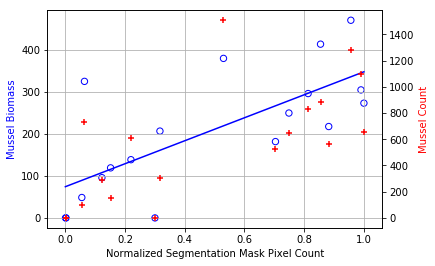

In [552]:
fig, ax = plt.subplots(1, 1)

ax.scatter(pix_ct, lab_targets[:, 0], marker='o', s=40, facecolors='none', edgecolors='b')
ax.set_ylabel('Mussel Biomass', color='b')
ax.set_xlabel('Normalized Segmentation Mask Pixel Count')
#ax.set_xlim(0, 1)
ax.plot(x, m*x + c, 'b')
ax.grid()

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
ax2.scatter(pix_ct, lab_targets[:, 1], marker='+', c='r')
ax2.set_ylabel('Mussel Count', color='r')

In [499]:
#np.unique(lab, return_counts=True)

In [544]:
np.linalg.lstsq?

In [547]:
A = np.vstack([pix_ct, np.ones(len(pix_ct))]).T

m, c = np.linalg.lstsq(A, lab_targets[:, 0], rcond=None)[0]

In [540]:
#lab_targets[np.isnan(lab_targets)] = 0

In [549]:
#lab_targets

In [551]:
#x = np.linspace(0, 1)